## TITANIC DATASET

### Dataset Story

Survived: Yolcunun hayatta kalma durumu (0: Hayatta kalmadı, 1: Hayatta kaldı).

Pclass: Yolcu sınıfı (1, 2, veya 3).

Sex: Yolcunun cinsiyeti (male veya female).

Age: Yolcunun yaşı.

SibSp: Yolcunun gemide bulunan eşi/kardeşi sayısı.

Parch: Yolcunun gemide bulunan ebeveyn/çocuk sayısı.

Fare: Bilet ücreti.

Embarked: Yolcunun gemiye hangi limandan bindiği (C: Cherbourg, Q: Queenstown, S: Southampton).





Makine öğrenimi uygulamalarında genellikle "Survived" sütunu tahmin edilmeye çalışılan hedef değişken olur. Diğer sütunlar ise modelin eğitilmesinde kullanılan özelliklerdir.

In [20]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
import seaborn as sns

%matplotlib inline

In [5]:
df = pd.read_csv("tested.csv")
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [8]:
df.describe()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


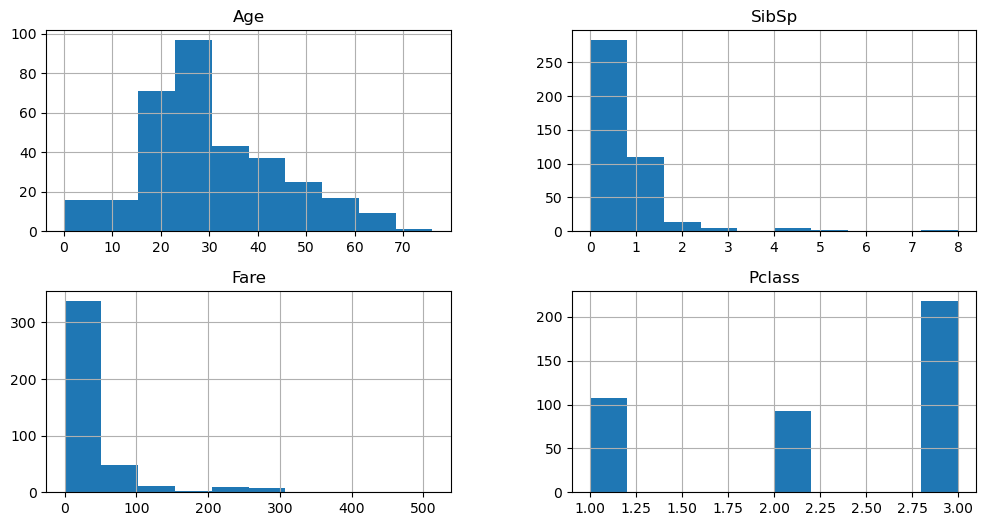

In [9]:
plt.rcParams['figure.figsize'] = (12,6)

viz = df[['Age','SibSp','Fare','Pclass']]
viz.hist()
plt.show()

In [23]:
df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S


In [27]:
cdf= df[['Survived','Age','Fare','SibSp',"Parch"]]
cdf.head(2)

,Survived,Age,Fare,SibSp,Parch
0,0,34.5,7.8292,0,0
1,1,47.0,7.0000,1,0


<Axes: xlabel='Pclass', ylabel='Survived'>

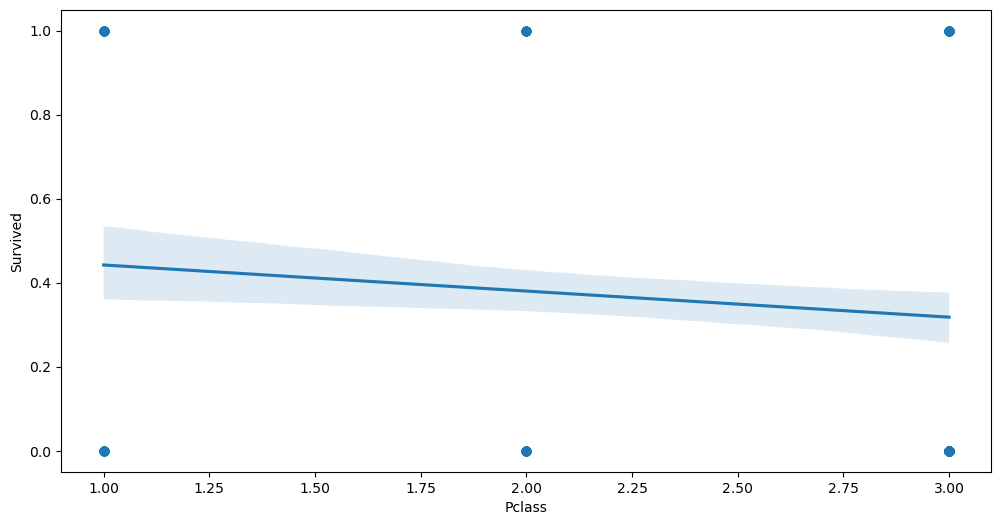

In [28]:
sns.regplot(x=df['Pclass'], y=df['Survived'])


<Axes: xlabel='Fare', ylabel='Survived'>

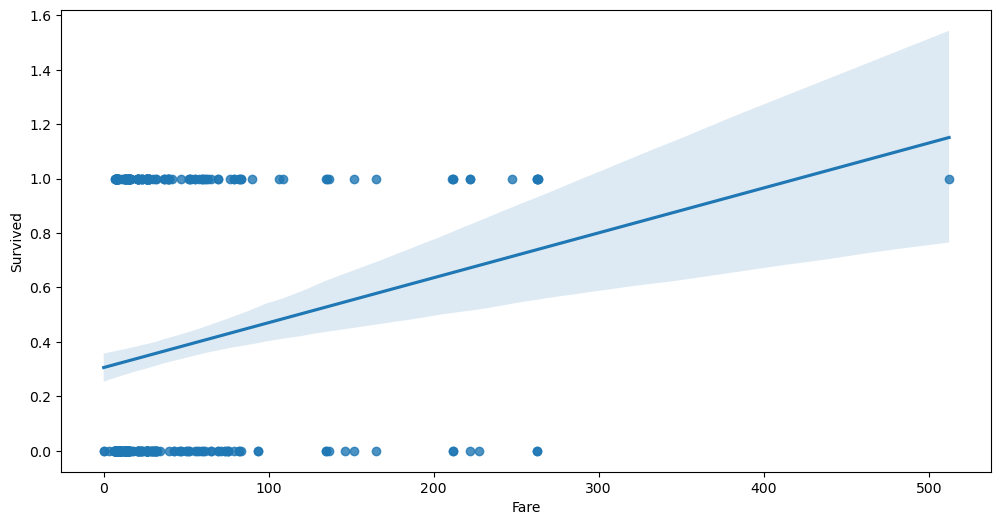

In [29]:
sns.regplot(x=df['Fare'], y=df['Survived'])


<Axes: xlabel='SibSp', ylabel='Survived'>

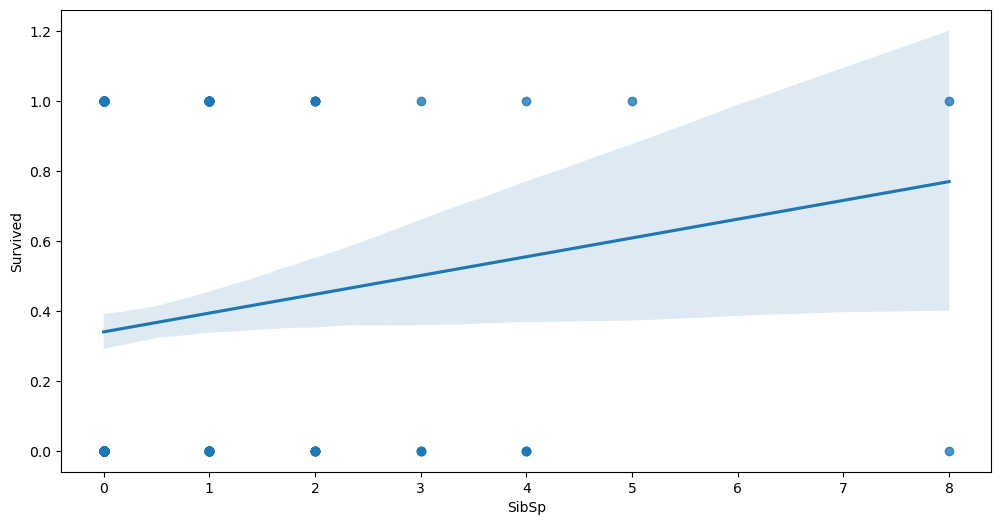

In [31]:
sns.regplot(x=df['SibSp'], y=df['Survived'])


In [32]:
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

In [33]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['Fare']])
train_y = np.asanyarray(train[['Survived']])

regr.fit(train_x, train_y)

LinearRegression()

In [34]:
print(regr.coef_) # θ1
print(regr.intercept_) # θ0

[[0.00182969]]
[0.29989821]


Multiple Linear Regression


In [35]:
cdf.head()


,Survived,Age,Fare,SibSp,Parch
0,0,34.5,7.8292,0,0
1,1,47.0,7.0000,1,0
2,0,62.0,9.6875,0,0
3,0,27.0,8.6625,0,0
4,1,22.0,12.2875,1,1


In [38]:
cdf.isnull().any()


Survived    False
Age          True
Fare         True
SibSp       False
Parch       False
dtype: bool

In [36]:
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

In [39]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
x = np.asanyarray(train[['SibSp','Parch']])
y = np.asanyarray(train[['Survived']])

regr.fit(x, y)

LinearRegression()

In [40]:
print('Coefficients:', regr.coef_)


Coefficients: [[0.03925417 0.09798839]]


In [41]:
# Prediction

y_hat = regr.predict(np.asanyarray(test[['SibSp','Parch']]))
x = np.asanyarray(test[['SibSp','Parch']])
y = np.asanyarray(test[['Survived']])

print("Mean Squared Error (MSE) : %.5f"
      % np.mean((y_hat - y) ** 2))

print('Variance score: %.5f' % regr.score(x, y)) # explained variance, best score is 1.0

Mean Squared Error (MSE) : 0.24621
Variance score: -0.04336


In [42]:
# Solution

regr = linear_model.LinearRegression()
x = np.asanyarray(train[['SibSp','Parch']])
y = np.asanyarray(train[['Survived']])
regr.fit (x, y)
print ('Coefficients: ', regr.coef_)
y_= regr.predict(np.asanyarray(test[['SibSp','Parch']]))
x = np.asanyarray(test[['SibSp','Parch']])
y = np.asanyarray(test[['Survived']])
print("Mean Squared Error (MSE): %.5f"% np.mean((y_ - y) ** 2))
print('Variance score: %.5f' % regr.score(x, y))

Coefficients:  [[0.03925417 0.09798839]]
Mean Squared Error (MSE): 0.24621
Variance score: -0.04336
